## Observations and Insights 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata)
# print(study_results)

# Combine the data into a single dataset
master = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
master

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
# print(len(master['Mouse ID']))
mcount = len(master['Mouse ID'].unique())
print(f'The total number of mice in the study is {mcount}.')

The total number of mice in the study is 249.


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mgroups = master.groupby(['Mouse ID']).count()['Timepoint']
mgroups_df = pd.DataFrame({'Timepoint Entries':mgroups}).sort_values(['Timepoint Entries'], ascending=False)
mgroups_df

,Timepoint Entries
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10
...,...
x226,1
b447,1
f932,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mindex = master.set_index('Mouse ID')
mindex = mindex.drop(['g989'])
mindex.reset_index(inplace=True)
mindex

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
cleanCount = len(mindex['Mouse ID'].unique())
print(f'The total number of mice in the cleaned study dataframe is {cleanCount}.')

The total number of mice in the cleaned study dataframe is 248.


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Determining all drugs used in the study.
# drugs = mindex['Drug Regimen'].unique()
# drugs

#Using groupby functions to collect data
mean = mindex.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = mindex.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = mindex.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
stdev = mindex.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = mindex.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Combining into one table
summary1 = pd.DataFrame({'Mean Volume':mean, 'Median Volume':median,'Variance':variance, 'Standard Dev':stdev, 'SEM':sem})
summary1

,Mean Volume,Median Volume,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary2 = mindex.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

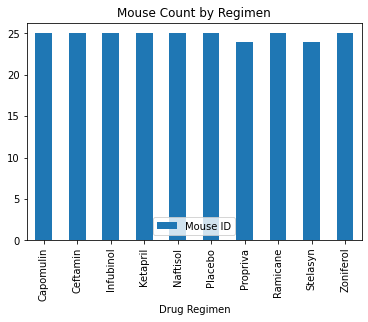

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bardata = pd.DataFrame(mindex.groupby(['Drug Regimen']).nunique()['Mouse ID'])
pdbar = bardata.plot.bar()
plt.title('Mouse Count by Regimen')
plt.show()

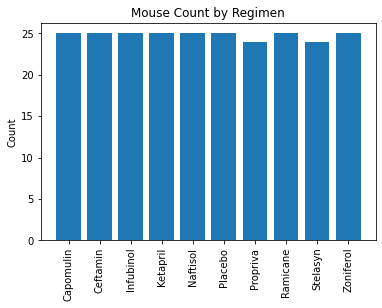

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar2 = mindex.drop_duplicates('Mouse ID')
bar2 = bar2.groupby(['Drug Regimen']).count()['Mouse ID']


fig = plt.figure()
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(drugs,bar2)
plt.title('Mouse Count by Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

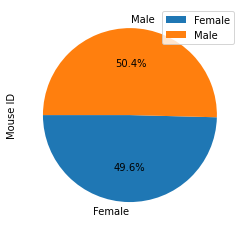

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piedata = pd.DataFrame(mindex.groupby(['Sex']).nunique()['Mouse ID'])
pdpie = piedata.plot.pie(subplots=True, startangle=180, autopct='%1.1f%%')

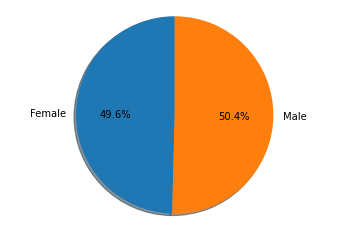

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
sizes = piedata['Mouse ID']
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
